In [ ]:
import pandas as pd
import numpy as np
import pickle

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns



x_train_audio = pd.read_csv('/content/drive/MyDrive/MFCCDeltaFeatures.csv')


xtrainaudiofull=pd.read_csv('/content/drive/MyDrive/MFCCDeltaFeaturestrain.csv')
y_train_audio = xtrainaudiofull['label']


y_train = y_train_audio  

print(x_train_audio.shape, y_train_audio.shape)

(108, 82) (108,)


In [ ]:
x_train_audio

,Unnamed: 0,file_name,mfcc0,mfcc_delta_0,mfcc1,mfcc_delta_1,mfcc2,mfcc_delta_2,mfcc3,mfcc_delta_3,...,mfcc35,mfcc_delta_35,mfcc36,mfcc_delta_36,mfcc37,mfcc_delta_37,mfcc38,mfcc_delta_38,mfcc39,mfcc_delta_39
0,0,/content/drive/MyDrive/ADReSS-IS2020-train/ADR...,-460.90607,-0.018794,106.734184,-0.001240,19.644960,0.001848,12.897753,0.001396,...,-3.188853,0.001488,-3.223350,0.001349,-3.295188,0.000805,-2.960966,0.000398,-2.589983,0.002936
1,1,/content/drive/MyDrive/ADReSS-IS2020-train/ADR...,-639.86945,0.043816,26.613937,0.022380,14.082454,0.010468,12.126171,0.008678,...,0.846052,-0.000148,1.175525,0.002494,1.431465,0.002802,1.537133,0.001584,1.515576,-0.000201
2,2,/content/drive/MyDrive/ADReSS-IS2020-train/ADR...,-431.11642,-0.034949,93.799420,-0.002451,12.218521,0.021432,0.382562,0.002659,...,2.838116,0.001317,3.085031,0.000482,3.389264,0.000252,3.557967,0.001019,3.429221,0.000965
3,3,/content/drive/MyDrive/ADReSS-IS2020-train/ADR...,-429.46110,-0.035754,94.118750,-0.024255,11.154120,0.007485,3.756388,0.008959,...,1.686478,-0.000933,1.807249,-0.002869,1.959160,-0.003992,2.679396,-0.001729,3.962038,0.000331
4,4,/content/drive/MyDrive/ADReSS-IS2020-train/ADR...,-662.18567,-0.019101,30.167618,-0.006534,8.654386,0.006215,5.094745,0.002016,...,-1.106185,0.001780,-0.842622,0.000748,-0.551393,0.001366,-0.836118,0.003177,-0.959681,-0.000054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,/content/drive/MyDrive/ADReSS-IS2020-train/ADR...,-257.00696,0.005968,165.744890,0.066067,11.250540,0.068997,4.709266,0.012074,...,-4.198981,0.009107,-4.751925,-0.000737,-5.169671,-0.003658,-5.064559,0.000765,-4.110144,0.004907
104,104,/content/drive/MyDrive/ADReSS-IS2020-train/ADR...,-384.31482,0.246331,119.023470,-0.011250,10.822275,-0.051819,10.476232,0.019245,...,-1.476437,0.005702,-2.167106,0.006980,-1.114018,0.007121,-1.348118,-0.001763,-2.191198,-0.011943
105,105,/content/drive/MyDrive/ADReSS-IS2020-train/ADR...,-401.28894,-0.020932,82.869350,0.016101,7.984150,0.005254,6.798459,-0.024294,...,0.939390,-0.004008,2.348096,0.001067,2.554813,0.000567,2.458925,-0.000944,2.620968,-0.000572
106,106,/content/drive/MyDrive/ADReSS-IS2020-train/ADR...,-411.27524,0.002620,88.563995,0.011765,8.849334,0.009350,16.664940,-0.009155,...,-0.437249,0.004563,0.684672,0.000890,2.327295,-0.002550,5.003067,-0.001830,4.178454,-0.001274


In [ ]:
x_test_audio = pd.read_csv('/content/drive/MyDrive/MFCCDeltaFeaturestestlabel.csv')


xtestaudiofull=pd.read_csv('/content/drive/MyDrive/MFCCDeltaFeaturestestlabelsorder.csv')
y_test_audio = xtestaudiofull['label']


y_test = y_test_audio  

print(x_test_audio.shape, y_test_audio.shape)

(48, 82) (48,)


In [ ]:
ytam=pd.read_csv('/content/drive/MyDrive/train108.csv')
y_train_mmse=ytam['mmse']

In [ ]:
ytestam=pd.read_csv('/content/drive/MyDrive/test108crct.csv')
y_test_mmse=ytestam['mmse']

In [ ]:
y_test_mmse

0     28
1     29
2     24
3     30
4     21
5     15
6     29
7     28
8     27
9     26
10    28
11    23
12    30
13    17
14    29
15    30
16    27
17    30
18    30
19    10
20    29
21    17
22    12
23    30
24    29
25    19
26    29
27    18
28    20
29    20
30    13
31    22
32    12
33    24
34    11
35    26
36    30
37    28
38    19
39    30
40    25
41    30
42    30
43    18
44    28
45    23
46    28
47    27
Name: mmse, dtype: int64

In [ ]:
y_train_mmse

0       30
1       30
2       29
3       30
4       30
      ... 
103     20
104     24
105     12
106     20
107     13
Name: mmse, Length: 108, dtype: object

In [ ]:
xtrainaudiofull=pd.read_csv('/content/drive/MyDrive/MFCCDeltaFeaturestrain.csv')
y_train_audio = xtrainaudiofull['label']

y_train = y_train_audio  

In [ ]:
y_train_audio

0      0
1      0
2      0
3      0
4      0
      ..
103    1
104    1
105    1
106    1
107    1
Name: label, Length: 108, dtype: int64

In [ ]:
y_train_text

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test_text

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0])

In [ ]:
y_test_audio

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    1
12    0
13    1
14    0
15    0
16    1
17    0
18    0
19    1
20    0
21    1
22    1
23    0
24    0
25    1
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    0
34    1
35    0
36    0
37    0
38    1
39    0
40    1
41    0
42    0
43    1
44    0
45    1
46    0
47    0
Name: label, dtype: int64

In [ ]:
y_test

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    1
12    0
13    1
14    0
15    0
16    1
17    0
18    0
19    1
20    0
21    1
22    1
23    0
24    0
25    1
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    0
34    1
35    0
36    0
37    0
38    1
39    0
40    1
41    0
42    0
43    1
44    0
45    1
46    0
47    0
Name: label, dtype: int64

In [ ]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
103    1
104    1
105    1
106    1
107    1
Name: label, Length: 108, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ad_dict = {'NON-AD': 0,
                'AD': 1}

ad_keys = list(['NON-AD', 'AD'])


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(ad_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F1-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=ad_keys)

## Get Text Features

In [ ]:
from numpy import load

x_train_text = load('/content/drive/MyDrive/fasttext+bert.npy')
y_train_text = load('/content/drive/MyDrive/labelstext_train.npy')
print(x_train_text.shape, y_train_text.shape)

(108, 1068) (108,)


In [ ]:
y_train_text

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:


x_test_text = load('/content/drive/MyDrive/fasttext+bert_test.npy')
y_test_text = load('/content/drive/MyDrive/labeltext_test.npy')
print(x_test_text.shape, y_test_text.shape)


(48, 1068) (48,)


In [ ]:
y_test=y_test_text

In [ ]:
import numpy
numpy.array_equal(y_test_text,y_test_audio, equal_nan=False)

True

In [ ]:
import numpy
numpy.array_equal(y_train_text,y_train_audio, equal_nan=False)

True

## Combine Text + Audio Features

In [ ]:
combinedxtrain = np.concatenate((np.array(x_train_audio[x_train_audio.columns[2:]]), x_train_text), axis=1)
combinedxtest = np.concatenate((np.array(x_test_audio[x_test_audio.columns[2:]]), x_test_text), axis=1)

print(combinedxtrain.shape)

combined_features_dict = {}

combined_features_dict['x_train'] = combinedxtrain
combined_features_dict['x_test'] = combinedxtest
combined_features_dict['y_train'] = np.array(y_train)
combined_features_dict['y_test'] = np.array(y_test)



(108, 1148)


In [ ]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
103    1
104    1
105    1
106    1
107    1
Name: label, Length: 108, dtype: int64

Test Set Accuracy =  0.812
Test Set F1-score =  0.810
Test Set Precision =  0.827
Test Set Recall =  0.812
Confusion matrix
[[22  2]
 [ 7 17]]


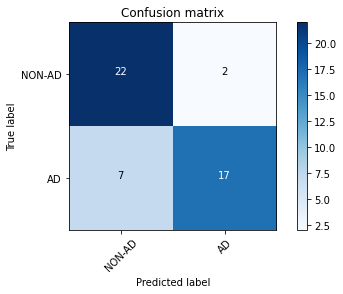

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier.fit(combinedxtrain, y_train)

pred_probs = rf_classifier.predict_proba(combinedxtest)
display_results(y_test, pred_probs)

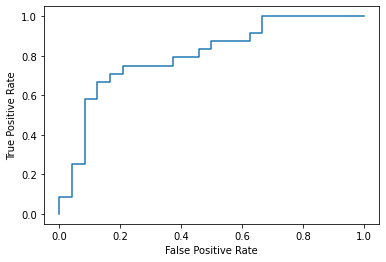

In [ ]:
pred_prob=[]


for p in pred_probs:
   pred_prob.append(max(p[0],p[1]))
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_prob)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Test Set Accuracy =  0.604
Test Set F1-score =  0.547
Test Set Precision =  0.709
Test Set Recall =  0.604
Confusion matrix
[[ 6 18]
 [ 1 23]]


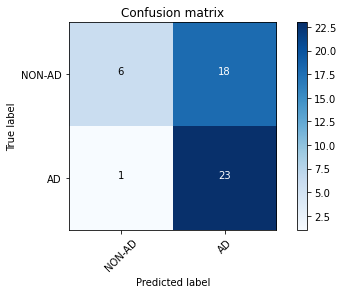

In [ ]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(500, ), activation='relu', solver='adam', alpha=0.0001,
                               batch_size='auto', learning_rate='adaptive', learning_rate_init=0.01,
                               power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001,
                               verbose=False, warm_start=True, momentum=0.8, nesterovs_momentum=True,
                               early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                               epsilon=1e-08)

mlp_classifier.fit(combinedxtrain, y_train)

pred_probs = mlp_classifier.predict_proba(combinedxtest)

display_results(y_test, pred_probs)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Test Set Accuracy =  0.729
Test Set F-score =  0.723
Test Set Precision =  0.750
Test Set Recall =  0.729
Confusion matrix
[[14 10]
 [ 3 21]]


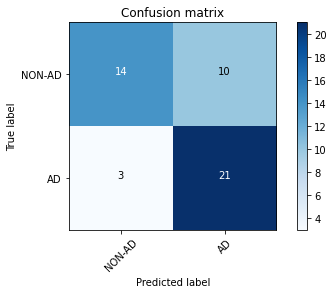

In [ ]:
svc_classifier = LinearSVC()

svc_classifier.fit(combinedxtrain, y_train)

pred = svc_classifier.predict(combinedxtest)


one_hot_true = one_hot_encoder(y_test, len(pred), len(ad_dict))
print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
plot_confusion_matrix(confusion_matrix(y_test, pred), classes=ad_keys)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test Set Accuracy =  0.792
Test Set F1-score =  0.790
Test Set Precision =  0.800
Test Set Recall =  0.792
Confusion matrix
[[21  3]
 [ 7 17]]


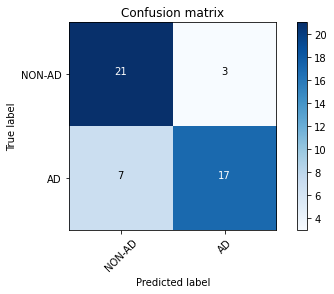

In [ ]:
lr_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

lr_classifier.fit(combinedxtrain, y_train)

pred_probs = lr_classifier.predict_proba(combinedxtest)

display_results(y_test, pred_probs)

Test Set Accuracy =  0.792
Test Set F1-score =  0.790
Test Set Precision =  0.800
Test Set Recall =  0.792
Confusion matrix
[[21  3]
 [ 7 17]]


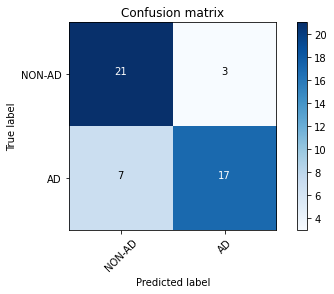

In [ ]:
xgb_classifier = xgb.XGBClassifier(max_depth=7, learning_rate=0.008, objective='multi:softprob', 
                                   n_estimators=600, sub_sample=0.8, num_class=len(ad_dict),
                                   booster='gbtree', n_jobs=4)
xgb_classifier.fit(combinedxtrain, y_train)
pred_probs = xgb_classifier.predict_proba(combinedxtest)
display_results(y_test, pred_probs)

In [ ]:
pred_prob=[]

for p in pred_probs:
   pred_prob.append(max(p[0],p[1]))
   

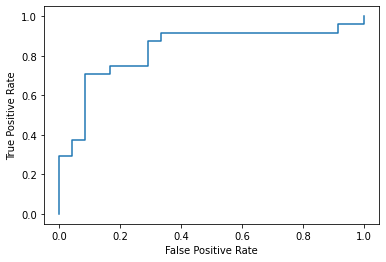

In [ ]:

y_pred_proba = lr_classifier.predict_proba(combinedxtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
pred_prob=[]


for p in pred_probs:
   pred_prob.append(max(p[0],p[1]))

Regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(combinedxtrain, y_train_mmse)
y_pred=rf.predict(combinedxtest)
from sklearn.metrics import mean_squared_error
print("RMSE : ",np.sqrt(mean_squared_error(y_test_mmse,y_pred)))

RMSE :  4.703686667741241


In [ ]:
regr = LinearRegression()  
regr.fit(combinedxtrain, y_train_mmse)
y_pred=regr.predict(combinedxtest)
from sklearn.metrics import mean_squared_error
print("RMSE : ",np.sqrt(mean_squared_error(y_test_mmse,y_pred)))

RMSE :  5.862264178597664
